In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import scipy
from scipy.optimize import curve_fit
from scipy.stats import bernoulli, norm, poisson, expon

# 日本語フォントの設定（Mac:'Hiragino Sans', Windows:'MS Gothic'）
plt.rcParams['font.family'] = 'Hiragino Sans'

# 準備

## プログラミング環境の構築

### Anacondaのインストール

既に「プログラミング基礎」の授業内でAnacondaをインストールしているはずなので，以下ではインストールの概要だけ述べる．詳細は[Python.jp](https://www.python.jp/install/anaconda/windows/install.html)や[Let'sプログラミング](https://www.javadrive.jp/python/install/index5.html)などが参考になる．

- [Anacondaの公式サイト](https://www.anaconda.com/products/individual)にアクセスする
- 下にスクロールし，"Anaconda Installers"から環境に応じたインストーラをダウンロードする
- ダウンロードしたインストーラをクリックし，画面の指示に従う
    - 途中で，`add Anaconda to the system Pass environment variable`にチェックを入れてPathの設定を行う
- Anaconda Navigatorが使えるか確認する

### 作業フォルダの作成

データ分析では，様々なファイルを扱わなければならない．
例えば，本講義では，Pythonのソースコード（`.py`），Jupyter NoteBook（`.ipynb`），データ（`.csv`），図（`.pdf`や`.png`）などのファイルを扱うことになる．
これらのファイルが自分のPC内のどこに保存されているかを把握しておかないと，ファイルを探すだけで時間を取られてしまい，時間の無駄である．
データ分析を始める際にまず行うべきことは，PC内のフォルダやファイルを整理することである．

まず本講義専用の作業フォルダを作成する．
名前は自分で分かれば何でも良いが，なるべく半角英数字とし，スペースは絶対に入れないこと．
作業フォルダの作成場所はできればクラウドストレージのフォルダ（OneDriveやGoogle Drive）の中に作ることを推奨する（こうすれば，自動的にクラウド上にバックアップされる）．

ここでは，`ローカルディスク（C:）>ユーザー>username>OneDrive`の中に`work`という作業フォルダを作ったとする：

```
[OneDrive]
    - [デスクトップ]
    - [ドキュメント]
    ...
    - [work]

```

本講義で扱うファイルは全てこの`work`の中に保存する．
`work`フォルダの中身は次のように章ごとのサブフォルダやレポート用のフォルダに分けておくと良い：
```
[work]
    - [1_introduction]
    - [2_environment]
        - 2_environment.ipynb
    - [report]
    - [others]
```

### Jupyter Lab

本講義ノートは`.ipynb`ファイルとしてダウンロードしてJupyter上で実行可能である．
Jupyterの環境構築の方法はいくつかあるので自分の好きな方法を選んで良いが，Anacondaをインストールすると，自動的にJupyter NotebookとJupyter Labが使えるようになる．

**Jupyter Labの起動**

- Anaconda Navigatorを起動
    - ［スタートメニュー］→［Anaconda Navigator (anaconda3)］
- ［Jupyter Lab］をクリック

**ノートブック（.ipynbファイル）の起動**

- `.ipynb`ファイルをダウンロードし，作業フォルダに保存する．
    - 講義ノート上部のアイコンから`.ipynb`をクリック
    - 自動保存された場合は`ダウンロード`フォルダ内に保存されているはず
- Jupyter Labを起動し，左上のフォルダアイコンをクリックする．
- .ipynbファイルを保存した作業フォルダに移動し，`.ipynb`ファイルをダブルクリックする．

### パス（Path）について

#### パスとは何か？
Pythonプログラムの実行，自分のPC上のファイルの読み込み，加工したデータの保存を行うには，対象となるファイルの在り処，つまりアドレスが分からないといけない．
このアドレスを指定する文字列のことをパス（Path）と呼ぶ．
Windowsの場合，パスはフォルダの階層構造を区切り文字`¥`（またはバックスラッシュ`\`）によって区切った形式で以下のように表される：

```
C:¥ユーザー¥ドキュメント
```

フォルダの階層の区切りは`¥`（またはバックスラッシュ`\\`）によって表されており，`¥`の隣にはフォルダの名前が記載されている．
上の例は，Cドライブ（`C:`）の中にある`ユーザー`フォルダの中の`ドキュメント`フォルダのパスを表す．

#### 絶対パスと相対パス
パスには絶対パスと相対パスの2種類が存在する．
パスを使用する場面の具体例として，matplotlibで描画した図を指定したフォルダ内に保存する場合を考える．
まず，以下のプログラムを実行する．

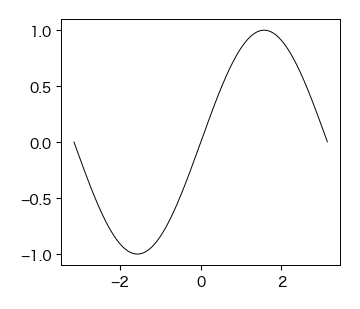

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(3.5, 3))
x = np.arange(-np.pi, np.pi, 0.01)
ax.plot(x, np.sin(x));

実行がうまくいけば，サイン関数が出力されるはずである．
出力された図を自分の作業フォルダに保存するには，`fig.savefig(path)`のように保存先のパスを指定すれば良い．
このとき，パスの指定方法には以下の２つの方法が存在する．

#### 1. 絶対パスによる指定

In [ ]:
fig.savefig(r"C:\Users\narizuka\OneDrive\sport_data\2_environment\graph.pdf")

この方法では，最も上の階層であるドライブ名（ここではCドライブ）から始まるパスを指定しており，これを**絶対パス**と呼ぶ．
Windowsで絶対パスを取得するには，パスをコピーしたいファイルやフォルダを右クリックし，「パスのコピー」を選択すれば良い．
絶対パスを使っておけばエラーは出にくいが，PCの奥深くにあるフォルダだとパスが長くなるという問題がある．

なお，Windows環境においてパスをコピーして貼り付けると区切り文字がバックスラッシュ`\`または`¥`になるはずである．
ところが，pythonではバックスラッシュ`\`と文字を組み合わせたエスケープシーケンスいう特別な文字列が存在し，例えば，`\n`は改行，`\t`はタブを表すエスケープシーケンスとなる．
これにより，上の例の中にある`\t`の部分はパスの区切りではなくエスケープシーケンスとして認識され，エラーが出ることがある（特に，pythonでファイルの入出力を行うとき）．
これを回避するにはパスの先頭に`r`を付ける．
これは，raw文字列と呼ばれ，""の中に指定した文字列をそのままの形で認識させることができる．

#### 2. 相対パスによる指定

In [ ]:
fig.savefig("./graph2.pdf")

2つ目の方法では，パスが`'.'`から始まっているが，これは現在の居場所（**カレントディレクトリ**と呼ぶ）のパスを意味する．
デフォルトではカレントディレクトリは`.ipynb`ファイルが保存されているフォルダとなる．
このように，カレントディレクトリのパス`'.'`から始まるパスを**相対パス**と呼ぶ．
カレントディレクトリは以下のコマンドにより任意のフォルダに変更することができる．

```python
import os
os.chdir(path)
```

相対パスを用いると，パスが短くなるので便利であるが，カレントディレクトリがどこなのかを認識しておく必要がある．

## Pythonの基礎知識

### Matplotlibの基礎

#### グラフの作成手順

Matplotlibを用いたグラフ作成にはいくつかのスタイルがあるが，本講義ではオブジェクトを明示的に生成するスタイル（オブジェクト指向スタイル）に従う．
このスタイルでは，`plt.subplots()`を用いて{numref}`fig:fig_axes`のようにFigureオブジェクトとAxesオブジェクトを生成し，個々のAxesオブジェクトに対してプロットを行う．
データのプロット，グラフの装飾，グラフの保存までの手順は以下の通りである．

```{figure} ../figure/fig_axes.png
---
height: 250px
name: fig:fig_axes
---
MatplotlibにおけるFigureオブジェクトとAxesオブジェクト
```

1. FigureオブジェクトとAxesオブジェクトを生成する
    ```python
    fig, ax = plt.subplots(figsize=(3, 3))
    ```
2. Axesオブジェクトのメソッドを用いてプロットする
    ```python
    ax.plot(x, y, option)
    ax.bar(x, y, option)
    ```
3. Axesを装飾する
    ```python
    ax.set_xlim(xmin, xmax)
    ax.set_xlabel('X')
    ```
4. Figureを保存する
    ```python
    fig.savefig('abc.pdf', dpi=80, transparent=True, bbox_inches='tight', pad_inches=0.2)
    ```

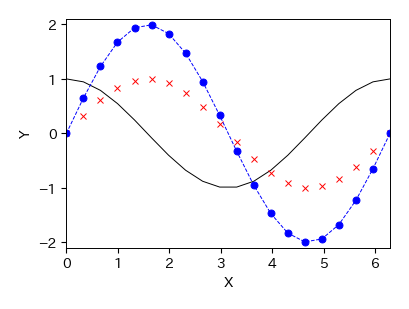

In [2]:
# FigureとAxesを生成する
fig, ax = plt.subplots(figsize=(4, 3))

# Axesに対してプロットする
x = np.linspace(0, 2*np.pi, 20)
ax.plot(x, np.cos(x), '-')   # 折れ線
ax.plot(x, np.sin(x), 'rx')  # 赤のo
ax.plot(x, 2*np.sin(x), 'bo--');  # 青のoを点線で結ぶ

# Axesを装飾する
ax.set_xlim(0, 2*np.pi); ax.set_ylim(-2.1, 2.1)
ax.set_xlabel('X'); ax.set_ylabel('Y')

# Figureを保存する（相対パスを指定）
fig.savefig('./graph1.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300);

#### ヒストグラムの描画

Matplotlibで1次元ヒストグラムを描画するには`ax.hist()`を用いる：

```python
ax.hist(data, bins, option)
```
- 第１引数には数値データを与える．
- `bins`引数には，ヒストグラムの階級数（または各階級の左端の値）を指定する．
- 例えば，`bins=n`とした場合，１つの階級の大きさは`(最大値-最小値) / n`となる．

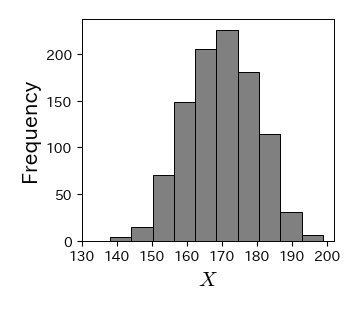

In [2]:
# データの作成
np.random.seed(20)
data = np.random.normal(170, 10, 1000)

# ヒストグラムの描画
fig, ax = plt.subplots()
ret = ax.hist(data, bins=10, color='gray', edgecolor='k')  # 階級数10

# 軸のラベル
ax.set_xlabel('$X$', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_xticks(np.arange(130, 210, 10));

**ヒストグラムの装飾**

`ax.hist`メソッドにも，色やスタイルを変更するためのオプションが多数用意されている．
主要なオプションを以下にまとめる．

| オプション |  内容 | 指定の仕方（例） | 
| ---- | ---- | ---- |
| histtype | ヒストグラムのスタイル | 'bar', 'step', 'stepfilled', 'barstacked' |
| color | 塗りつぶしの色 | 色名 |
| edgecolor | 枠線の色 | 色名 |
| linewidth | 枠線の太さ | 数値 |
| linestyle | 線種 | '-', '--', '-.', ':' |
| rwidth | バーの幅 | 数値（0~1） |
| align | バーの中央を階級のどこに合わせるか | 'left'（階級の左端）, 'mid'（階級の中央＝デフォルト）, 'right'（階級の右端） |
| density | Trueの場合は縦軸を相対度数に変更 | True/False |
| cumulative | Trueの場合は縦軸を累積度数に変更 | 1（下側累積）, 0, -1（上側累積） |

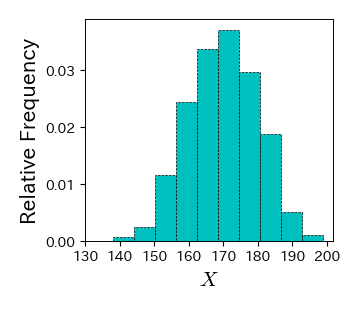

In [5]:
# データの作成
np.random.seed(20)
data = np.random.normal(170, 10, 1000)

fig, ax = plt.subplots()
ret = ax.hist(data, 
              bins=10,
              # bins=[-4, -3, -2, -1, 0, 1, 2, 3, 4], # 階級の左端の値を指定する場合
              histtype='bar',  # ヒストグラムのスタイルを棒グラフに
              color='c',       # バーの色をシアンに
              edgecolor='k',   # バーの枠線の色を黒に
              linewidth=0.5,   # バーの枠線の太さを1に
              linestyle='--',  # 枠線を点線に
              density=True     # 縦軸を相対度数に
              )

# 軸のラベル
ax.set_xlabel('$X$', fontsize=15)
ax.set_ylabel('Relative Frequency', fontsize=15)
ax.set_xticks(np.arange(130, 210, 10));

### `scipy.stats`の基礎

Pythonには，科学技術計算に特化した `scipy` というライブラリが存在する．
確率分布に関する計算（例えば，正規分布に従う乱数の生成など）には，`numpy`を使用することもできるが，`scipy.stats`の方が機能が充実している．

`scipy`には，確率分布の種類別に様々なメソッドが用意されており，

```python
scipy.stats.確率分布名.メソッド名
```

のように使用する．
例えば，標準正規分布（Normal Distribution）に従うサイズ10の標本を生成するには以下のように`rvs`メソッドを用いる

In [7]:
scipy.stats.norm.rvs(loc=0, scale=1, size=10)

array([ 0.70665337, -0.65556939,  0.05352554, -0.48794803, -0.13015145,
        0.12643226,  0.10962104, -0.24369086,  1.40478357, -0.02629885])

**主要な確率分布**

| コマンド | 確率分布 |
| --- | --- |
| `scipy.stats.bernoulli` | ベルヌーイ分布 |
| `scipy.stats.binom` | 二項分布 |
| `scipy.stats.poisson` | ポアソン分布 |
| `scipy.stats.geom` | 幾何分布 |
| `scipy.stats.norm` | 正規分布 |
| `scipy.stats.expon` | 指数分布 |
| `scipy.stats.gamma` | ガンマ分布 |

**主なメソッド**

| メソッド | 内容 | 備考 |
| --- | --- | --- |
| `rvs` | 対応する確率分布に従うデータを生成する |
| `pmf` | 確率質量関数を計算する | 離散型確率分布のみ |
| `pdf` | 確率密度関数を計算する | 連続型確率分布のみ |
| `cdf` | 累積分布関数を計算する | |
| `ppf` | パーセント点に対応する`x`の値を計算する | |

#### 例：ポアソン分布

In [29]:
# ポアソン分布に従うサイズ100の標本を生成
data = scipy.stats.poisson.rvs(mu=3, size=100)

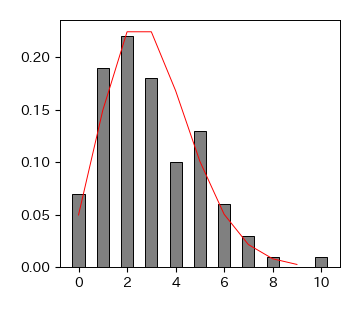

In [30]:
# ヒストグラムを描画する
fig, ax = plt.subplots()
ret = ax.hist(data, bins=np.arange(data.max()+2)-0.5, density=1, color='gray', edgecolor='k', rwidth=0.5)  # 階級数10

# 確率質量関数を描画する
k = np.arange(0, 10, 1)
ax.plot(k, scipy.stats.poisson.pmf(k, mu=3), 'r-')

#### 例：正規分布

In [17]:
# 標準正規分布に従うサイズ100の標本を生成
data = scipy.stats.norm.rvs(size=100)

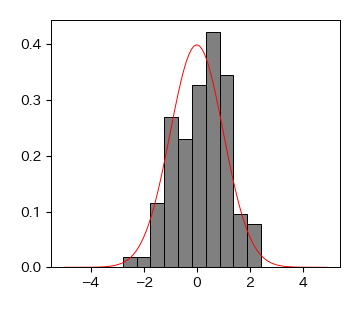

In [18]:
# ヒストグラムを描画する
fig, ax = plt.subplots()
ret = ax.hist(data, bins=10, density=1, color='gray', edgecolor='k')  # 階級数10

# 確率密度関数を描画する
x = np.arange(-5, 5, 0.1)
ax.plot(x, scipy.stats.norm.pdf(x, loc=0, scale=1), 'r-')